In [18]:
#Reduction to Linear regression
#y=Sepal Length
#x=Pedal Width
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [19]:
#Create a TF Graph Session
sess=tf.Session()

In [20]:
#Load the data
#iris.data=[(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris=datasets.load_iris()
x_vals=np.array([x[3] for x in iris.data])
y_vals=np.array([y[0] for y in iris.data])

#Split data into train/test sets
train_indices=np.random.choice(len(x_vals),round(len(x_vals)*0.8),replace=False)
test_indices=np.array(list(set(range(len(x_vals)))-set(train_indices)))
x_vals_train=x_vals[train_indices]
x_vals_test=x_vals[test_indices]
y_vals_train=y_vals[train_indices]
y_vals_test=y_vals[test_indices]

In [21]:
#Declare batch size
batch_size=50

#Initialize placeholders
x_data=tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)

#Create variables for linear regression
A=tf.Variable(tf.random_normal(shape=[1,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))

In [22]:
#Create the model
#Declare model operations
model_output=tf.add(tf.matmul(x_data,A),b)

In [23]:
#Declare loss function
#=max(0,abs(target-predicted)+epsilon)
#1/2 margin width parameter=epsilon
epsilon=tf.constant([0.5])
#Margin term in loss
loss=tf.reduce_mean(tf.maximum(0.,tf.subtract(tf.abs(tf.subtract(model_output,y_target)),epsilon)))

In [24]:
#Declare optimizer
my_opt=tf.train.GradientDescentOptimizer(0.075)
train_step=my_opt.minimize(loss)

#Initialize variables
init=tf.global_variables_initializer()
sess.run(init)

In [25]:
#Training loop
train_loss=[]
test_loss=[]
for i in range(200):
    rand_index=np.random.choice(len(x_vals_train),size=batch_size)
    rand_x=np.transpose([x_vals_train[rand_index]])
    rand_y=np.transpose([y_vals_train[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    temp_train_loss=sess.run(loss,feed_dict={x_data:np.transpose([x_vals_train]),y_target:np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    
    temp_test_loss=sess.run(loss,feed_dict={x_data:np.transpose([x_vals_test]),y_target:np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    if(i+1)%50==0:
        print('--------')
        print('Generation: '+str(i+1))
        print('A= '+str(sess.run(A))+' b='+str(sess.run(b)))
        print('Train Loss= '+str(temp_train_loss))
        print('Test Loss= '+str(temp_test_loss))        

--------
Generation: 50
A= [[2.244095]] b=[[2.661822]]
Train Loss= 0.60793674
Test Loss= 0.563896
--------
Generation: 100
A= [[1.6974958]] b=[[3.6293218]]
Train Loss= 0.26950985
Test Loss= 0.26492047
--------
Generation: 150
A= [[1.2483958]] b=[[4.2533216]]
Train Loss= 0.10753198
Test Loss= 0.12535305
--------
Generation: 200
A= [[1.0647961]] b=[[4.469321]]
Train Loss= 0.08776913
Test Loss= 0.09812916


In [26]:
#For plotting,
#Extract Coefficients
[[slope]]=sess.run(A)
[[y_intercept]]=sess.run(b)
[width]=sess.run(epsilon)

#Get best fit line
best_fit=[]
best_fit_upper=[]
best_fit_lower=[]
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

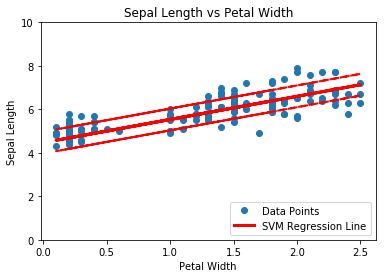

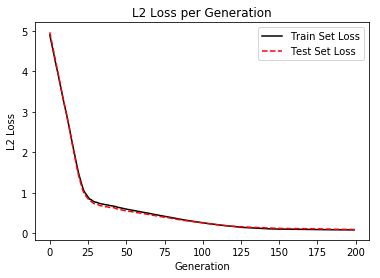

In [27]:
#Plot fit with data
plt.plot(x_vals,y_vals,'o',label='Data Points')
plt.plot(x_vals,best_fit,'r-',label='SVM Regression Line', linewidth=3)
plt.plot(x_vals,best_fit_upper,'r--',linewidth=2)
plt.plot(x_vals,best_fit_lower,'r--',linewidth=2)
plt.ylim([0,10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

#Plot loss over time
plt.plot(train_loss,'k-',label='Train Set Loss')
plt.plot(test_loss,'r--',label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()

In [31]:
#Working with Kernels
#Linear Kernel:K(x1,x2)=x1^T*x2
#Gaussian Kernel(RBF):K(x1,x2)=exp(-gama|x1-x2|^2)
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [32]:
#Start a computational graph session
sess=tf.Session()

In [34]:
#Generate non_linear data
(x_vals,y_vals)=datasets.make_circles(n_samples=350,factor=.5,noise=.1)
y_vals=np.array([1 if y==1 else -1 for y in y_vals])
class1_x=[x[0] for i,x in enumerate(x_vals) if y_vals[i]==1]
class1_y=[x[1] for i,x in enumerate(x_vals) if y_vals[i]==1]
class2_x=[x[0] for i,x in enumerate(x_vals) if y_vals[i]==-1]
class2_y=[x[1] for i,x in enumerate(x_vals) if y_vals[i]==-1]

In [36]:
#Declare batch size
batch_size=350

#Initialize placeholders
x_data=tf.placeholder(shape=[None,2],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)
prediction_grid=tf.placeholder(shape=[None,2],dtype=tf.float32)

#Create variables for svm
b=tf.Variable(tf.random_normal(shape=[1,batch_size]))

In [38]:
#Apply kernel
#Linear Kernel
#my_kernel=tf.matmul(x_data,tf.transpose(x_data))

#Gaussian(RBF) kernel
gamma=tf.constant(-50.0)
dist=tf.reduce_sum(tf.square(x_data),1)
dist=tf.reshape(dist,[-1,1])
sq_dists=tf.add(tf.subtract(dist,tf.multiply(2.,tf.matmul(x_data,tf.transpose(x_data)))),tf.transpose(dist))
my_kernel=tf.exp(tf.multiply(gamma,tf.abs(sq_dists)))

In [39]:
#Compute SVM Model
first_term=tf.reduce_sum(b)
b_vec_cross=tf.matmul(tf.transpose(b),b)
y_target_cross=tf.matmul(y_target,tf.transpose(y_target))
second_term=tf.reduce_sum(tf.multiply(my_kernel,tf.multiply(b_vec_cross,y_target_cross)))
loss=tf.negative(tf.subtract(first_term,second_term))

In [41]:
#Create Prediction Kernel
#Linear prediction kernel
#my_kernel=tf.matmul(x_data,tf.transpose(prediction_grid))

#Gaussian(RBF) prediction kernel
rA=tf.reshape(tf.reduce_sum(tf.square(x_data),1),[-1,1])
rB=tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1),[-1,1])
pred_sq_dist=tf.add(tf.subtract(rA,tf.multiply(2.,tf.matmul(x_data,tf.transpose(prediction_grid)))),tf.transpose(rB))
pred_kernel=tf.exp(tf.multiply(gamma,tf.abs(pred_sq_dist)))

In [42]:
#Create a predicion operation.
prediction_output=tf.matmul(tf.multiply(tf.transpose(y_target),b),pred_kernel)
prediction=tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction),tf.squeeze(y_target)),tf.float32))

In [43]:
#Declare optimizer
my_opt=tf.train.GradientDescentOptimizer(0.002)
train_step=my_opt.minimize(loss)

#Initialize variables
init=tf.global_variables_initializer()
sess.run(init)

In [47]:
#Training loop
loss_vec=[]
batch_accuracy=[]
for i in range(1000):
    rand_index=np.random.choice(len(x_vals),size=batch_size)
    rand_x=x_vals[rand_index]
    rand_y=np.transpose([y_vals[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp=sess.run(accuracy,feed_dict={x_data:rand_x,y_target:rand_y,prediction_grid:rand_x})
    
    batch_accuracy.append(acc_temp)
    
    if(i+1)%250==0:
        print('Step #'+str(i+1))
        print('Loss = '+str(temp_loss))

Step #250
Loss = 27.35502
Step #500
Loss = -5.7945633
Step #750
Loss = -10.779297
Step #1000
Loss = -12.19481


In [48]:
#Create a mesh to plot points in
x_min,x_max=x_vals[:,0].min()-1,x_vals[:,0].max()+1
y_min,y_max=x_vals[:,0].min()-1,x_vals[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
grid_points=np.c_[xx.ravel(),yy.ravel()]
[grid_predictions]=sess.run(prediction,feed_dict={x_data:x_vals,y_target:np.transpose([y_vals]),prediction_grid:grid_points})
grid_predictions=grid_predictions.reshape(xx.shape)

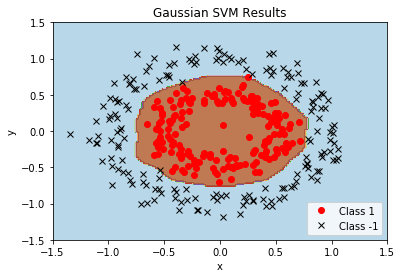

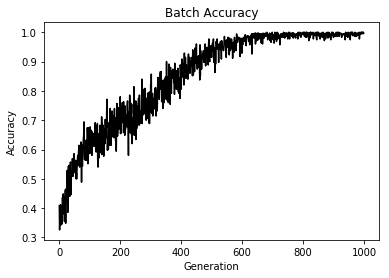

In [49]:
#Plot points and grid
plt.contourf(xx,yy,grid_predictions,cmap=plt.cm.Paired,alpha=0.8)
plt.plot(class1_x,class1_y,'ro',label='Class 1')
plt.plot(class2_x,class2_y,'kx',label='Class -1')
plt.title('Gaussian SVM Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.show()

#Plot batch accuracy
plt.plot(batch_accuracy,'k-',label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.show()

In [50]:
#Prediction/Evaluatuion
#New data points:
new_points = np.array([(-0.75, -0.75),
                       (-0.5, -0.5),
                       (-0.25, -0.25),
                       (0.25, 0.25),
                       (0.5, 0.5),
                       (0.75, 0.75)])

In [51]:
[evaluations]=sess.run(prediction,feed_dict={x_data:x_vals,y_target:np.transpose([y_vals]),prediction_grid:new_points})

In [53]:
for ix,p in enumerate(new_points):
    print('{}:class={}'.format(p,evaluations[ix]))

[-0.75 -0.75]:class=-1.0
[-0.5 -0.5]:class=1.0
[-0.25 -0.25]:class=1.0
[0.25 0.25]:class=1.0
[0.5 0.5]:class=-1.0
[0.75 0.75]:class=-1.0


In [1]:
#Implementing_nonlinear_svms
#K(x1,x2)=exp(-gamma*(x1-x2)^2)
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [11]:
#Create a graph session
sess=tf.Session()

In [12]:
#Load the Iris Data
#x1='Sepal Length'
#x2='Petal Width'
#Load the data
#iris.data=[(Sepal Length,Sepal Width,Petal Length,Petal Width)]
iris=datasets.load_iris()
x_vals=np.array([[x[0],x[3]] for x in iris.data])
y_vals=np.array([1 if y==0 else -1 for y in iris.target])
class1_x=[x[0] for i,x in enumerate(x_vals) if y_vals[i]==1]
class1_y=[x[1] for i,x in enumerate(x_vals) if y_vals[i]==1]
class2_x=[x[0] for i,x in enumerate(x_vals) if y_vals[i]==-1]
class2_y=[x[1] for i,x in enumerate(x_vals) if y_vals[i]==-1]

In [13]:
#Model Parameters
#Declare batch size
batch_size=150

#Initialize placeholsers
x_data=tf.placeholder(shape=[None,2],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)
prediction_grid=tf.placeholder(shape=[None,2],dtype=tf.float32)

#Create variables for svm
b=tf.Variable(tf.random_normal(shape=[1,batch_size]))

In [14]:
#Gaussian(RBF) Kernel
#large gamma leads to high bias and low variance models.
gamma=tf.constant(-50.0)
sq_vec=tf.multiply(2.,tf.matmul(x_data,tf.transpose(x_data)))
my_kernel=tf.exp(tf.multiply(gamma,tf.abs(sq_vec)))

In [15]:
#Compute SVM Model
#-(sum(b)-sum(K*|b|^2*|y|^2))
first_term=tf.reduce_sum(b)
b_vec_cross=tf.matmul(tf.transpose(b),b)
y_target_cross=tf.matmul(y_target,tf.transpose(y_target))
second_term=tf.reduce_sum(tf.multiply(my_kernel,tf.multiply(b_vec_cross,y_target_cross)))
loss=tf.negative(tf.subtract(first_term,second_term))

In [16]:
#Define the Predictino Kernel
#Gaussian(RBF) predictino kernel
rA=tf.reshape(tf.reduce_sum(tf.square(x_data),1),[-1,1])
rB=tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1),[-1,1])
pred_sq_dist=tf.add(tf.subtract(rA,tf.multiply(2.,tf.matmul(x_data,tf.transpose(prediction_grid)))),tf.transpose(rB))
pred_kernel=tf.exp(tf.multiply(gamma,tf.abs(pred_sq_dist)))

prediction_output=tf.matmul(tf.multiply(tf.transpose(y_target),b),pred_kernel)
prediction=tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction),tf.squeeze(y_target)),tf.float32))

In [17]:
#Optimizing Method
#Declare optimizer
my_opt=tf.train.GradientDescentOptimizer(0.01)
train_step=my_opt.minimize(loss)

#Initialize variables
init=tf.global_variables_initializer()
sess.run(init)

In [28]:
#Run the Classification
#Training loop
loss_vec=[]
batch_accuracy=[]
for i in range(300):
    rand_index=np.random.choice(len(x_vals),size=batch_size)
    rand_x=x_vals[rand_index]
    rand_y=np.transpose([y_vals[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp=sess.run(accuracy,feed_dict={x_data:rand_x,y_target:rand_y,prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    
    if(i+1)%75==0:
        print('Step #'+str(i+1))
        print('Loss= '+str(temp_loss))

Step #75
Loss= -118.48282
Step #150
Loss= -230.98274
Step #225
Loss= -343.48273
Step #300
Loss= -455.9829


In [29]:
#Plotting Results
#Create a mesh to plot points in
x_min,x_max=x_vals[:,0].min()-1,x_vals[:,0].max()+1
y_min,y_max=x_vals[:,1].min()-1,x_vals[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
grid_points=np.c_[xx.ravel(),yy.ravel()]
[grid_predictions]=sess.run(prediction,feed_dict={x_data:x_vals,y_target:np.transpose([y_vals]),prediction_grid:grid_points})
grid_predictions=grid_predictions.reshape(xx.shape)

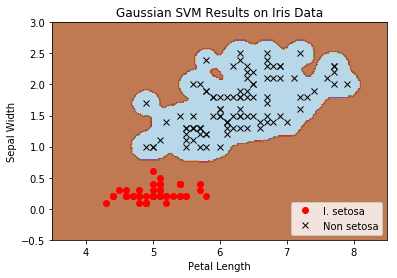

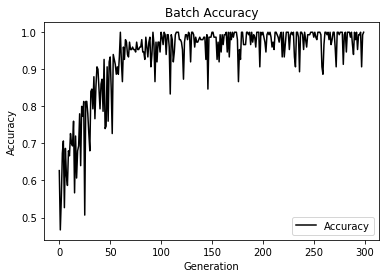

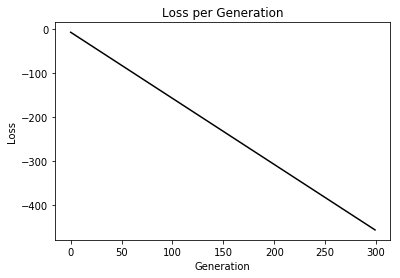

In [30]:
#matplotlib inline
#Plot points and grid
plt.contourf(xx,yy,grid_predictions,cmap=plt.cm.Paired,alpha=0.8)
plt.plot(class1_x,class1_y,'ro',label='I. setosa')
plt.plot(class2_x,class2_y,'kx',label='Non setosa')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5,3.0])
plt.xlim([3.5,8.5])
plt.show()

#Plot bach accuracy
plt.plot(batch_accuracy,'k-',label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#Plot loss over time
plt.plot(loss_vec,'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [31]:
#Evaluate Test Points
x_test_seq=np.array([4.,5.,6.,7.])
y_test_seq=np.array([0.,1.,2.])

x_test,y_test=np.meshgrid(x_test_seq,y_test_seq)
test_points=np.c_[x_test.ravel(),y_test.ravel()]

In [32]:
test_points

array([[4., 0.],
       [5., 0.],
       [6., 0.],
       [7., 0.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [4., 2.],
       [5., 2.],
       [6., 2.],
       [7., 2.]])

In [33]:
test_points

array([[4., 0.],
       [5., 0.],
       [6., 0.],
       [7., 0.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [4., 2.],
       [5., 2.],
       [6., 2.],
       [7., 2.]])

In [34]:
[test_predictions]=sess.run(prediction,feed_dict={x_data:x_vals,y_target:np.transpose([y_vals]),prediction_grid:test_points})

In [35]:
test_predictions.ravel()

array([ 1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.],
      dtype=float32)

In [36]:
for ix,point in enumerate(test_points):
    point_pred=test_predictions.ravel()[ix]
    print('Point {} is predicted to be in class {}'.format(point,point_pred))

Point [4. 0.] is predicted to be in class 1.0
Point [5. 0.] is predicted to be in class 1.0
Point [6. 0.] is predicted to be in class 1.0
Point [7. 0.] is predicted to be in class 1.0
Point [4. 1.] is predicted to be in class 1.0
Point [5. 1.] is predicted to be in class -1.0
Point [6. 1.] is predicted to be in class -1.0
Point [7. 1.] is predicted to be in class 1.0
Point [4. 2.] is predicted to be in class 1.0
Point [5. 2.] is predicted to be in class 1.0
Point [6. 2.] is predicted to be in class -1.0
Point [7. 2.] is predicted to be in class -1.0


In [37]:
#Multi-class(Nonlinear) SVM Example
#X:Sepal Length,Petal Width
#Y:I.setosa,I.virginica,I.versicolor

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [38]:
#Start a computational graph session.
sess=tf.Session()

In [39]:
#Load the data
#iris.data=[(Sepal Length,Sepal Width,Petal Length,Petal Width)]
iris=datasets.load_iris()
x_vals=np.array([[x[0],x[3]] for x in iris.data])
y_vals1=np.array([1 if y==0 else -1 for y in iris.target])
y_vals2=np.array([1 if y==1 else -1 for y in iris.target])
y_vals3=np.array([1 if y==2 else -1 for y in iris.target])
y_vals=np.array([y_vals1,y_vals2,y_vals3])
class1_x=[x[0] for i,x in enumerate(x_vals) if iris.target[i]==0]
class1_y=[x[1] for i,x in enumerate(x_vals) if iris.target[i]==0]
class2_x=[x[0] for i,x in enumerate(x_vals) if iris.target[i]==1]
class2_y=[x[1] for i,x in enumerate(x_vals) if iris.target[i]==1]
class3_x=[x[0] for i,x in enumerate(x_vals) if iris.target[i]==2]
class3_y=[x[1] for i,x in enumerate(x_vals) if iris.target[i]==2]

In [40]:
#Declare the batch size
batch_size=50

In [41]:
#Initialize placeholders
x_data=tf.placeholder(shape=[None,2],dtype=tf.float32)
y_target=tf.placeholder(shape=[3,None],dtype=tf.float32)
prediction_grid=tf.placeholder(shape=[None,2],dtype=tf.float32)

#Create variables for svm
b=tf.Variable(tf.random_normal(shape=[3,batch_size]))

In [42]:
#Gaussian(RBF) kernel
gamma=tf.constant(-10.0)
dist=tf.reduce_sum(tf.square(x_data),1)
dist=tf.reshape(dist,[-1,1])
sq_dists=tf.multiply(2.,tf.matmul(x_data,tf.transpose(x_data)))
my_kernel=tf.exp(tf.multiply(gamma,tf.abs(sq_dists)))

In [51]:
#Declare function to do reshape/batch multiplication
def reshape_matmul(mat,_size):
    v1=tf.expand_dims(mat,1)
    v2=tf.reshape(v1,[3,_size,1])
    return (tf.matmul(v2,v1))

In [52]:
#Compute SVM Model
first_term=tf.reduce_sum(b)
b_vec_cross=tf.matmul(tf.transpose(b),b)
y_target_cross=reshape_matmul(y_target,batch_size)

second_term=tf.reduce_sum(tf.multiply(my_kernel,tf.multiply(b_vec_cross,y_target_cross)),[1,2])
loss=tf.reduce_sum(tf.negative(tf.subtract(first_term,second_term)))

In [53]:
#Gaussian(RBF) prediction kernel
rA=tf.reshape(tf.reduce_sum(tf.square(x_data),1),[-1,1])
rB=tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1),[-1,1])
pred_sq_dist=tf.add(tf.subtract(rA,tf.multiply(2.,tf.matmul(x_data,tf.transpose(prediction_grid)))),tf.transpose(rB))
pred_kernel=tf.exp(tf.multiply(gamma,tf.abs(pred_sq_dist)))

prediction_output=tf.matmul(tf.multiply(y_target,b),pred_kernel)
prediction=tf.argmax(prediction_output-tf.expand_dims(tf.reduce_mean(prediction_output,1),1),0)
accuracy=tf.reduce_mean(tf.cast(tf.equal(prediction,tf.argmax(y_target,0)),tf.float32))

In [59]:
#Declare optimizer
my_opt=tf.train.GradientDescentOptimizer(0.01)
train_step=my_opt.minimize(loss)

#Initialize variables
init=tf.global_variables_initializer()
sess.run(init)

In [60]:
#Training loop
loss_vec=[]
batch_accuracy=[]
for i in range(100):
    rand_index=np.random.choice(len(x_vals), size=batch_size)
    rand_x=x_vals[rand_index]
    rand_y=y_vals[:,rand_index]
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp=sess.run(accuracy,feed_dict={x_data:rand_x,y_target:rand_y,prediction_grid:rand_x})
    
    batch_accuracy.append(acc_temp)
    
    if(i+1)%25==0:
        print('Step #'+str(i+1))
        print('Loss= '+str(temp_loss))

Step #25
Loss= -342.3493
Step #50
Loss= -679.8491
Step #75
Loss= -1017.3488
Step #100
Loss= -1354.8489


In [62]:
#Create a mesh to plot points in
x_min,x_max=x_vals[:,0].min()-1,x_vals[:,0].max()+1
y_min,y_max=x_vals[:,1].min()-1,x_vals[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
grid_points=np.c_[xx.ravel(),yy.ravel()]
grid_predictions=sess.run(prediction,feed_dict={x_data:rand_x,y_target:rand_y,prediction_grid:grid_points})
grid_predictions=grid_predictions.reshape(xx.shape)

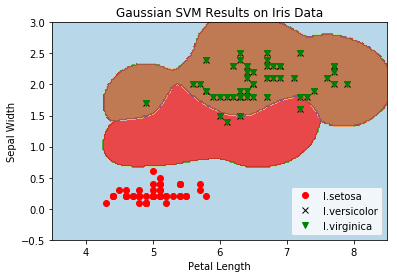

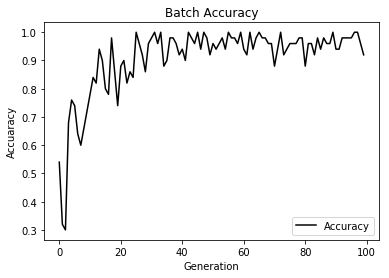

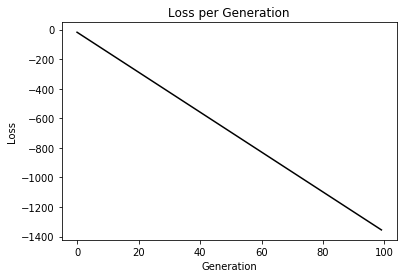

In [63]:
#Plot points and grid
plt.contourf(xx,yy,grid_predictions,cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x,class1_y,'ro',label='I.setosa')
plt.plot(class3_x,class3_y,'kx',label='I.versicolor')
plt.plot(class3_x,class3_y,'gv',label='I.virginica')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5,3.0])
plt.xlim([3.5,8.5])
plt.show()

#Plot batch accuracy
plt.plot(batch_accuracy,'k-',label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuaracy')
plt.legend(loc='lower right')
plt.show()

#Plot loss over time
plt.plot(loss_vec,'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()